# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
# your answer here
employee= pd.read_csv('Employee.csv')
employee.head(2)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [8]:
# your answer here-1st way
pd.pivot_table(employee, index=["Department"], values=["Salary"], aggfunc=np.mean)


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [5]:
# your answer here-2nd way
employee.groupby('Department')['Salary'].mean()




Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [14]:
# your answer here
#Ya solo recuerda que si el lab te pide que compares el sueldo de dos columnas entonces la idea es que una de las columnas la metas en tu índice, y la otra en columns, en lugar de pasarles ambas en la misma lista
employee.pivot_table(index=["Department", "Years"], columns=["Title"], aggfunc={"Salary":'mean'}, fill_value=0)


Salary                  
Title                VP analyst associate
Department Years                         
HR         2          0      30         0
           4          0      35         0
           8         70       0         0
IT         1          0      35         0
           2          0      30         0
           7          0       0        60
           8         70       0         0
Sales      2          0       0        55
           3          0       0        55

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [9]:
# your answer here

employee.pivot_table(index=["Department", "Title"], values=["Years", "Salary"], aggfunc=np.sum)

Salary  Years
Department Title                   
HR         VP             70      8
           analyst        65      6
IT         VP             70      8
           analyst        65      3
           associate      60      7
Sales      associate     110      5

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [20]:
# your answer here
#employee.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=np.mean).reset_index()
#employee.groupby('Department').agg({'Name':'sum', 'Salary':'mean'}).reset_index()

table = employee.pivot_table(index=["Department", "Title", "Years"], values=["Salary", "Name"], aggfunc={"Salary":np.mean, "Name":"sum"})
table


Name  Salary
Department Title     Years                
HR         VP        8         Ana      70
           analyst   2       David      30
                     4       Sonia      35
IT         VP        8      Carlos      70
           analyst   1        Jose      35
                     2       Maria      30
           associate 7       Pedro      60
Sales      associate 2         Eva      55
                     3      Samuel      55

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [11]:
# your answer here
employee.pivot_table(index=["Department", "Title"], aggfunc={"Salary":"mean", "Salary":"min", "Salary":"max", "Salary":"std"})



,,Salary
Department,Title,
HR,analyst,3.535534
IT,analyst,3.535534
Sales,associate,0.000000


#### Based on your comments, fill the missing values with an appropriate value

In [9]:
# your answer here



#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here



#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [45]:
# your answer here
employee.pivot_table(index=["Department", "Title"], values=["Salary"], 


SyntaxError: invalid syntax (<ipython-input-45-98aedbb233c5>, line 2)

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here



# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [59]:
# your answer here

fitbit=pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [60]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [16]:
# your answer here


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [62]:
# your answer here
fitbit[['Minutes Very Active', 'Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [63]:
# your answer here
import matplotlib
import matplotlib.pyplot as plt

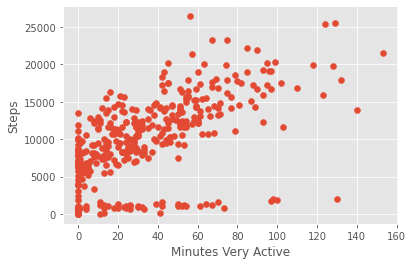

In [66]:
x=fitbit['Minutes Very Active']
y=fitbit['Steps']

matplotlib.style.use('ggplot')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.scatter(x,y)

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [69]:
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


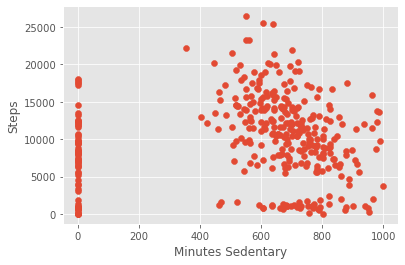

In [68]:
# your answer here
x=fitbit['Minutes Sedentary']
y=fitbit['Steps']
matplotlib.style.use('ggplot')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.scatter(x,y)

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [21]:
# your answer here

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [70]:
# your answer here
fitbit[['MinutesOfSleep', 'Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2d4327b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2d4337280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2d4327820>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa2d4337940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2d4337c40>,
 'means': []}

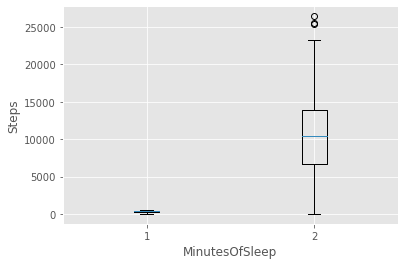

In [72]:
# your answer here
x=fitbit['MinutesOfSleep']
y=fitbit['Steps']
matplotlib.style.use('ggplot')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.boxplot([x,y])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [75]:
# your answer here
cor_fit=fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

In [76]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [80]:
# your answer here
cor_fit.sort_values(by='Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [28]:
# your answer here

In [29]:
#Print time_grades

#### Show visually the frequency distribution of the time_grades dataset.

In [30]:
# your answer here

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [31]:
# your answer here-Pearson 

In [32]:
## your answer here-Spearman

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [33]:
# your answer here

In [34]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here